In [4]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order,get_unique_table_num,cont,get_count,get_unique_table,get_unique_table_num
from TDD.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs,gen_cir
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit

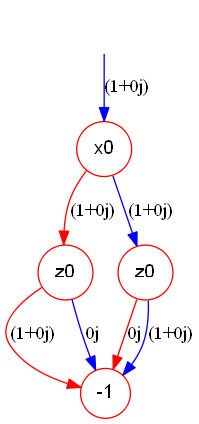

In [5]:
order = ['x0','y0','z0','x1','y1','z1','x2','y2','z2']
order.reverse()
Ini_TDD(order)
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
X=np.array([[0,1],[1,0]])
Z=np.array([[1,0],[0,-1]])
var=[Index('x0'),Index('y0')]
ts1=Tensor(H,var)

tdd1=ts1.tdd()
# tdd1.show(False)

var2=[Index('y0'),Index('z0')]
ts2=Tensor(H,var2)
tdd2=ts2.tdd()
# # tn=TensorNetwork([ts1,ts2])
# # tdd=tn.cont()
tdd=cont(tdd1,tdd2)
# tdd.show()
tdd.show()

In [6]:
path='Benchmarks/'
path=''
# file_name="3_17_13.qasm"
file_name="test.qasm"
cir = QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs = cir_2_tn(cir)
n=get_real_qubit_num(cir)
# add_inputs(tn,[0]*n,n)
# all_indexs.reverse()
# print(all_indexs)
Ini_TDD(index_order=all_indexs,max_rank=300)
t_start=time.time()
# start = get_current_memory_gb()
tdd=tn.cont()
# print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
print(tdd.key_2_index)
# print(get_unique_table_num())
# end = get_current_memory_gb()
# print(end-start)
# get_count()
# tdd.show()

(-0.031249999999999976-0.031249999999999976j)
2172
{0: 'x0', 1: 'y0', 2: 'x1', 3: 'y1', 4: 'x2', 5: 'y2', 6: 'x3', 7: 'y3', 8: 'x4', 9: 'y4', 10: 'x5', 11: 'y5', 12: 'x6', 13: 'y6', 14: 'x7', 15: 'y7', 16: 'x8', 17: 'y8', 18: 'x9', 19: 'y9'}


In [7]:
Ini_TDD(index_order=all_indexs,max_rank=300)
tdd=tn.cont(optimizer='cir_partition1')
print(tdd.weight)
print(tdd.node_number())
# tdd.show()

(-0.1249999999999999+0.1249999999999999j)
3070


In [8]:
Ini_TDD(index_order=all_indexs,max_rank=300)
tdd=tn.cont(optimizer='cir_partition2')
print(tdd.weight)
print(tdd.node_number())
# print(tdd.key_2_index)
# tdd.show()

(-0.12499999999999989+0.12499999999999992j)
3070


In [9]:
# n=15
# m=200
# cir=gen_cir('Random_Clifford',n,m,True)
# tn,all_indexs = cir_2_tn(cir)
# n=get_real_qubit_num(cir)
# # add_inputs(tn,[0]*n,n)
# all_indexs.reverse()
# Ini_TDD(index_order=all_indexs)
# t_start=time.time()
# tdd=tn.cont()
# print(time.time()-t_start)
# print(tdd.weight)
# print(tdd.node_number())
# # tdd.show()